# Gradient Descent in Numerical Computation

## Introduction
Gradient descent is an optimization algorithm used to minimize functions by iteratively moving towards the steepest descent, as defined by the negative of the gradient. It is widely used in machine learning and deep learning for optimizing cost functions.

## Mathematical Background
### Gradient Descent Algorithm
The gradient descent algorithm updates the parameters $\theta$ of a function to minimize the cost function $J(\theta)$:

$\theta := \theta - \alpha \nabla J(\theta)$
where:
- $\alpha$ is the learning rate
- $\nabla J(\theta)$ is the gradient of the cost function with respect to $\theta$


## In this notebook :
In this notebook, in the first section, first we create some data points. then, we want to fit a regression line to this points using gradient descent. at the end, we visualize the regression lines that we find through gradient descent updates.
In the secons section, we analyze that does gradient descent always converge to optimal solution or not.

## Create Data
Generate some data with y = $\theta_1*x + \theta_2$

$\theta_1 = 3$

$\theta_2 = 4$


Add some Gaussian noise to the data and plot the points and the main line

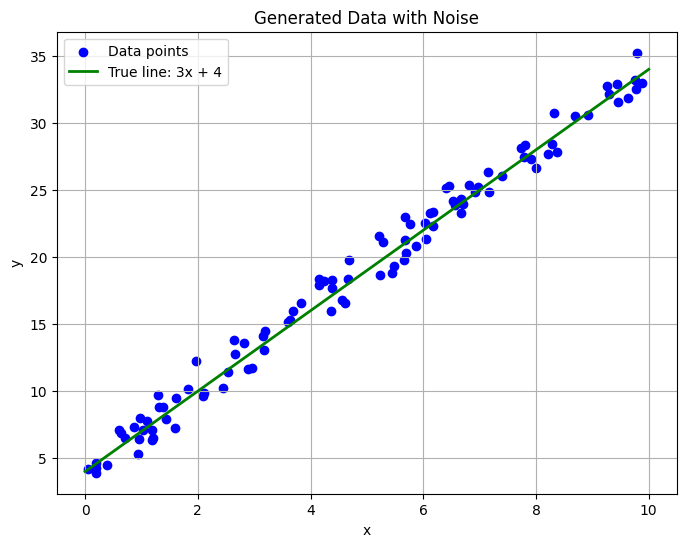

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta1_true = 3
theta2_true = 4
num_points = 100

# Generate x values and corresponding y values with noise
np.random.seed(0)
x = np.random.rand(num_points) * 10  # x values in range [0, 10)
noise = np.random.normal(scale=2, size=num_points)  # Gaussian noise with std deviation 2
y = theta1_true * x + theta2_true + noise * 0.5

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', color='b', label='Data points')


# True line y = 3x + 4
x_true = np.linspace(0, 10, 100)
y_true = theta1_true * x_true + theta2_true
plt.plot(x_true, y_true, color='g', linestyle='-', linewidth=2, label='True line: 3x + 4')


plt.title('Generated Data with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

implement gradient_descent and compute_cost functions. note that x and y are values of x's and y's points(noisy points), slope and intercept are the values of regression line that we are trying to find and fit to the data.
compute_cost function is a simple function to calculate the error or cost of the predicted value and main value.

In [19]:
def gradient_descent(x, y, slope, intercept, learning_rate, num_iters):
    m = len(y)
    for _ in range(num_iters):
        y_pred = slope * x + intercept
        slope -= learning_rate * np.sum((y_pred - y) * x) / m
        intercept -= learning_rate * np.sum(y_pred - y) / m
    return slope, intercept

def compute_cost(x, y, slope, intercept):
    m = len(y)
    y_pred = slope * x + intercept
    cost = np.sum((y_pred - y) ** 2) / (2 * m)
    return cost

In this cell, for the num_iterations, do gradient descent algorithm and save slope and intercepts, also compute costs and save them to.

In [20]:
slope = 0
intercept = 0

learning_rate = 0.01
num_iterations = 100

slope_history = []
intercept_history = []
cost_history = []

for i in range(num_iterations):
    y_pred = slope * x + intercept

    slope_gradient = np.sum((y_pred - y) * x) / len(y)
    intercept_gradient = np.sum(y_pred - y) / len(y)

    slope -= learning_rate * slope_gradient
    intercept -= learning_rate * intercept_gradient

    cost = np.sum((y_pred - y) ** 2) / (2 * len(y))

    slope_history.append(slope)
    intercept_history.append(intercept)
    cost_history.append(cost)

print(f'Final slope: {slope:.2f}, Final intercept: {intercept:.2f}')
print(f'Final cost: {cost:.2f}')

Final slope: 3.43, Final intercept: 1.41
Final cost: 1.58


Now, plot the regression lines with the saved slope and intercepts all in 1 plot and visualize them.

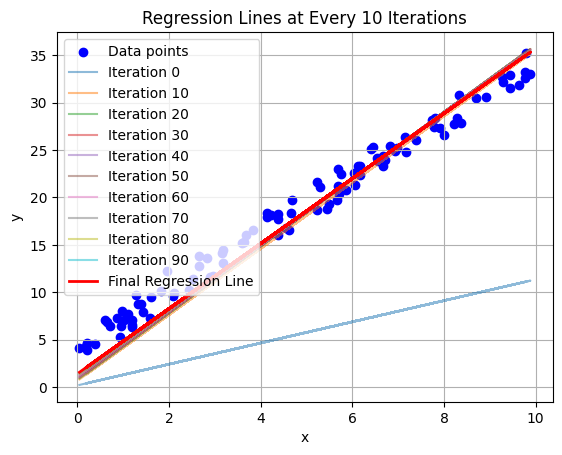

In [23]:
plt.scatter(x, y, color='b', label='Data points')

for i in range(0, num_iterations, 10):
    slope_plot = slope_history[i]
    intercept_plot = intercept_history[i]
    y_pred_plot = slope_plot * x + intercept_plot
    plt.plot(x, y_pred_plot, label=f'Iteration {i}', alpha=0.5)

# Plot the final regression line
plt.plot(x, slope * x + intercept, color='r', linewidth=2, label='Final Regression Line')

plt.title('Regression Lines at Every 10 Iterations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Now plot the costs against iterations.

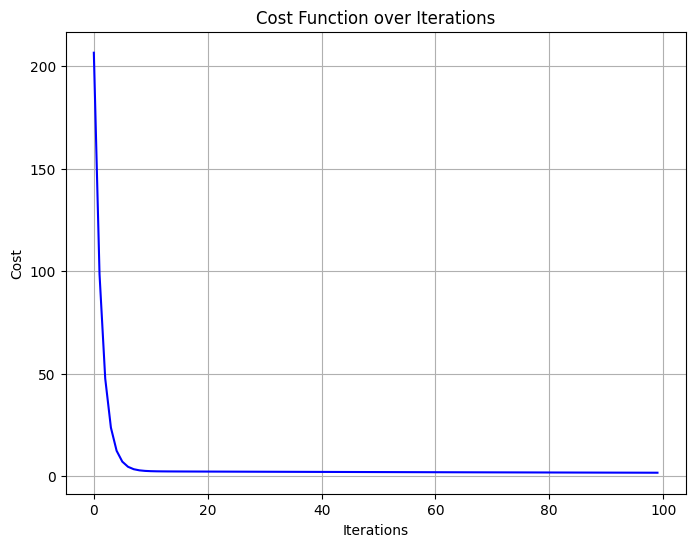

In [24]:
# Plot costs against iterations
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), cost_history, color='b')
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

## Section 2:
In this section, we define a function that has some local minimas. then we use gradient descent algorithm with random points and visualize the function and the minimums that find with gradient descent.

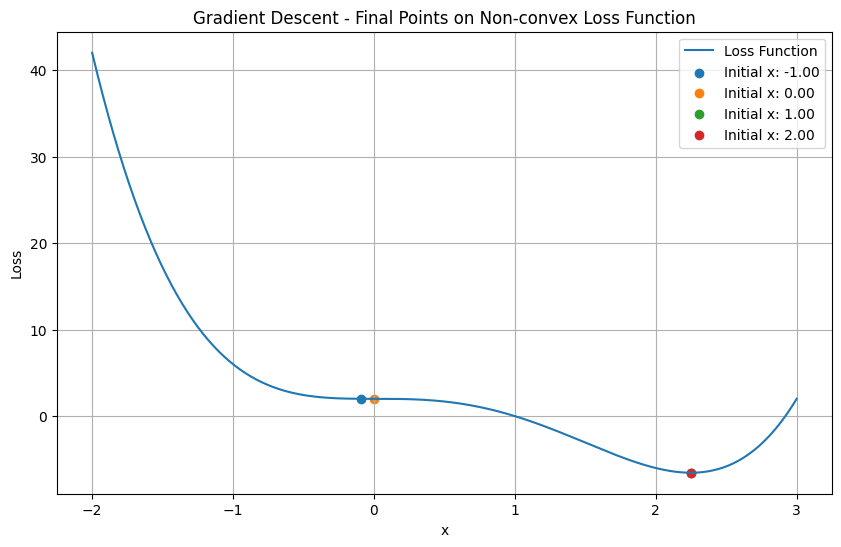

Final points found by gradient descent: [-0.08956763372835358, 0.0, 2.2499999977310154, 2.249999999949603]


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple non-convex loss function with multiple local minima
def loss_function(x):
    return x**4 - 3*x**3 + 2

# Define the derivative of the loss function (gradient)
def gradient(x):
    return 4*x**3 - 9*x**2

def gradient_descent_final_point(gradient_fn, initial_x, learning_rate, num_iterations):
    x = initial_x

    for _ in range(num_iterations):
        grad = gradient_fn(x)
        x -= learning_rate * grad

    return x

x_vals = np.linspace(-2, 3, 400)
y_vals = loss_function(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Loss Function')

initial_points = [-1, 0, 1, 2]
learning_rate = 0.01
num_iterations = 100

final_points = []

for initial_x in initial_points:
    final_x = gradient_descent_final_point(gradient, initial_x, learning_rate, num_iterations)
    final_points.append(final_x)
    plt.scatter(final_x, loss_function(final_x), marker='o', label=f'Initial x: {initial_x:.2f}')

plt.title('Gradient Descent - Final Points on Non-convex Loss Function')
plt.xlabel('x')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print(f'Final points found by gradient descent: {final_points}')


## Question :
Does gradient descent converges to the optimum solution or not in this example ?
Does gradient descent always converges to the optimum solution ? under what circumstances gradient descent converges ?

Gradient descent is a fundamental optimization technique used to minimize functions by iteratively adjusting parameters in the direction of the negative gradient. Whether gradient descent converges to the optimal solution depends heavily on the nature of the function being minimized. For convex functions, which have a single global minimum, gradient descent is guaranteed to converge to this optimal point regardless of the initial starting point or learning rate, provided the algorithm is run for a sufficient number of iterations. This property makes gradient descent particularly effective for convex optimization problems in fields like machine learning and numerical computation.

However, for non-convex functions, such as those with multiple local minima or saddle points, the convergence of gradient descent to the global optimum is not assured. Instead, gradient descent tends to converge to a local minimum or a saddle point depending on its starting point and the chosen learning rate. Finding the global minimum in such scenarios can be challenging since it requires navigating through various local optima. To improve the chances of finding a better solution, practitioners often employ strategies like randomized initializations and adaptive learning rates, alongside running gradient descent multiple times to explore different parts of the function's landscape. These considerations highlight the nuanced application of gradient descent in non-convex optimization tasks where careful parameter tuning and exploration are essential for achieving desired outcomes.